# Ejercicios GLM
**Integrantes**: Dayana Valentina Gonzalez, Maria Fernanda Rodriguez 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import patsy
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import itertools

%matplotlib inline

# Ejercicio 1

**[1]** Esta pregunta debe responderse utilizando el dataset ``Weekly``. Esta información es contiene 1,089 declaraciones semanales durante 21 años, desde el comienzo de 1990 hasta el final de 2010.

Realice una regresión logística con ``Direction`` como respuesta y las cinco variables ``lag`` más ``Volume`` como predictores. Usando `glm` de statmodels, use diferentes funciones de enlace y comente las diferencias. Use la función `summary` (de statmodels) para imprimir los resultados. ¿Que conclusiones puede obtener de cada modelo?


In [2]:
weekly = pd.read_csv('weekly.csv' )
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


**funcion de enlace: logit**

In [3]:
fit = smf.glm('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
              data=weekly, 
              family=sm.families.Binomial(link=sm.families.links.logit())).fit() 
print(fit.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Mon, 08 Nov 2021   Deviance:                       1486.4
Time:                                          16:14:41   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

De acuerdo con este modelo obtuvimos que la variable que mas afecta los resultados es **Lag2** pues tiene un valor p de 0.03 el cual es muy pequeño.

**funcion de enlace: probit**

In [4]:
fit = smf.glm('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
              data=weekly, 
              family=sm.families.Binomial(link=sm.families.links.probit())).fit() 
print(fit.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                   probit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.17
Date:                                  Mon, 08 Nov 2021   Deviance:                       1486.3
Time:                                          16:14:41   Pearson chi2:                 1.09e+03
No. Iterations:                                       5                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

De acuerdo con este modelo obtuvimos que la variable que mas afecta los resultados es **Lag2** pues tiene un valor p de 0.029 el cual es muy pequeño. Este modelo resulto ser muy parecido a los resultados de la funcion de enlace **logit**

**funcion de enlace: cauchy**

In [5]:
fit = smf.glm('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
              data=weekly, 
              family=sm.families.Binomial(link=sm.families.links.cauchy())).fit() 
print(fit.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                   cauchy   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.19
Date:                                  Mon, 08 Nov 2021   Deviance:                       1486.4
Time:                                          16:14:41   Pearson chi2:                 1.09e+03
No. Iterations:                                       6                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

De acuerdo con este modelo obtuvimos que la variable que mas afecta los resultados es **Lag2** pues tiene un valor p de 0.035 el cual es muy pequeño. Aunque es mas alto que los anteriores modelos tambien nos muestra resultados similares.

# Ejercicio 2

En este ejercicio trabajaremos con el conjunto da datos de  `gotelli.csv`. Este dataset investiga los determinantes biográficos de la riqueza de especies a escala regional (Gotelli y Everson, 2002). El objetivo principal de este ejercicio es replicar la **regresión de Poisson** de la riqueza de una especie de hormiga contra la latitud, la elevación y el tipo de hábitat en su papel. 

**(1)** Cargue el dataset y grafique una matriz de dispersión, y evalue si hay algún tipo de colinealidad entre las variables.

**Cargamos el dataset gotelli.csv:**

In [6]:
gotelli = pd.read_csv('gotelli.csv' )
gotelli.head()

,Site,Srich,Habitat,Latitude,Elevation
0,TPB,6,Forest,41.97,389
1,HBC,16,Forest,42.00,8
2,CKB,18,Forest,42.03,152
3,SKP,17,Forest,42.05,1
4,CB,9,Forest,42.05,210


**Matriz de dispersión**

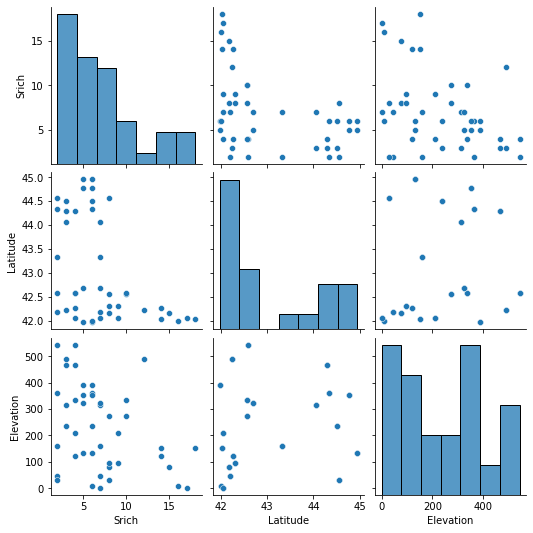

In [7]:
sns.pairplot(gotelli)

**Evaluamos colinealidad**

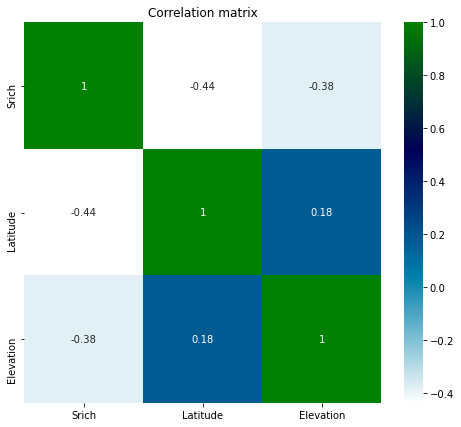

In [8]:
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(gotelli.corr(),cmap = 'ocean_r', annot=True, cbar=True )
ax.set_title('Correlation matrix')
plt.show()

Las variables latitude y srich estan moderadamente correlacionadas de forma negativa, de igual forma las variables elevation y srich. Latitude con Elevation tienen una correlacion pequeña. Por estas razones existe colinealidad.

**(2)** Divida el conjunto en un training y test set. A partir de ahora sólo trabaje con el Training set.

In [9]:
gotelli['Forest'] =  np.where(gotelli['Habitat'] == 'Forest', 1, 0)
gotelli.head()

,Site,Srich,Habitat,Latitude,Elevation,Forest
0,TPB,6,Forest,41.97,389,1
1,HBC,16,Forest,42.00,8,1
2,CKB,18,Forest,42.03,152,1
3,SKP,17,Forest,42.05,1,1
4,CB,9,Forest,42.05,210,1


In [10]:
X_train, X_test = train_test_split(gotelli[['Srich','Forest','Latitude','Elevation']], test_size=0.33, random_state=42)

**(3)** Realice una regresión de Poisson, involucrando las variables de habitat, latitude y la elevación y sus interacciones. Determine los VIF para cada variable. Evalue el modelo con alguna métrica sobre el Test set (R2, varianza explicada, RMSE, etc).

In [11]:
fit = smf.glm('Srich ~ Forest+Latitude+Elevation', 
              data=X_train, 
              family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Srich   No. Observations:                   29
Model:                            GLM   Df Residuals:                       25
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.979
Date:                Mon, 08 Nov 2021   Deviance:                       22.880
Time:                        16:14:45   Pearson chi2:                     22.9
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2029      3.116      3.595      0.0

In [12]:
predi=fit.predict(X_test)
predi

37     3.183330
24     5.639559
25     6.282143
36     4.203146
34     3.729888
40     3.056396
4     11.467779
12     7.954402
8     11.667097
3     13.397370
6     12.549139
27     5.775886
31     5.528210
19     7.513742
17     6.163752
dtype: float64

In [13]:
r2_score(X_test[['Srich']], predi)

0.45339304634886757

In [14]:
mean_squared_error(X_test[['Srich']], predi)

10.703778834608396

In [15]:
def calc_vif(fit):
    """Calcula el VIF para un modelo fit resultado del ajuste de GLM (o OLS)"""

    cov = fit.cov_params() # extrae la covarianza
    corr = cov / fit.bse / fit.bse # Calcula la correlacion con base en los parametros
    
    vif = pd.Series(np.diag(np.linalg.inv(corr.values[1:, 1:])), index=fit.bse.index[1:])

    return(vif)

In [16]:
calc_vif(fit)

Forest       1.000016
Latitude     1.037349
Elevation    1.037332
dtype: float64

* Forest tiene VIF de casi 1 por lo cual no hay relacion entre la variable independiente y las otras variables.
* Latitude tiene VIF de casi 1 por lo cual no hay relacion entre la variable independiente y las otras variables.
* Elevation tiene VIF de casi 1 por lo cual no hay relacion entre la variable independiente y las otras variables.

**(4)** Si hay una covariación alta centre las variables (restar la media).

No hay covarianza alta entre las variables.

**(5)** Realice de nuevo el modelo con la regresión de Poisson y evalue la colinealidad con el VIF. Evalue el modelo sobre el Test set.

In [17]:
fit = smf.glm('Latitude ~ Srich*Forest+Elevation', 
              data=X_train, 
              family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Latitude   No. Observations:                   29
Model:                            GLM   Df Residuals:                       24
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81.573
Date:                Mon, 08 Nov 2021   Deviance:                      0.60366
Time:                        16:14:46   Pearson chi2:                    0.605
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7805      0.116     32.467   

In [18]:
predi=fit.predict(X_test)
predi

37    43.288784
24    41.620387
25    42.732008
36    43.482913
34    43.394044
40    43.306500
4     43.122146
12    43.931398
8     42.272955
3     41.786275
6     43.512476
27    42.558869
31    42.555024
19    43.339551
17    43.616968
dtype: float64

In [19]:
r2_score(X_test[['Srich']], predi)

-64.63696388063435

In [20]:
mean_squared_error(X_test[['Srich']], predi)

1285.3176127025552

In [21]:
calc_vif(fit)

Srich           10.491038
Forest           6.617783
Srich:Forest    22.950447
Elevation        1.132530
dtype: float64

Evaluando la interaccion entre Srich y Forest obtuvimos una mayor correlacion entre las variables, con un VIF de 10 en Srich, 6 en Forest y 22 entre ambos, lo cual indica una alta multicolinealidad entre estas variables y las demás.